In [172]:
import cv2
import numpy as np
import pytesseract
from pytesseract import image_to_string
import os
import re
import matplotlib.pyplot as plt

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe" # CHANGE THIS to your own location of tesseract.exe

# 1. Crop video

Done in Handbrake

# 2. Break up videos into frames

In [13]:
path = r'.\CPM vs time data 2\1_time.mp4'

cap = cv2.VideoCapture(path)
success,image = cap.read()
print(success)
count = 0
while success:
    cap.set(cv2.CAP_PROP_POS_MSEC,(count*1000)) 
    cv2.imwrite(".\\CPM vs time data 2\\timeframes\\frame%d.png" % count, image)
    success,image = cap.read()
    print('Read a new frame: ', success)
    count += 1

True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new 

In [16]:
path = r'.\CPM vs time data 2\1_CPM.mp4'
newpath=r'.\CPM vs time data 2\CPMframes'
if not os.path.exists(newpath):
    os.makedirs(newpath)

cap = cv2.VideoCapture(path)
success,image = cap.read()
print(success)
count = 0
while success:
    cap.set(cv2.CAP_PROP_POS_MSEC,(count*1000)) 
    cv2.imwrite(".\\CPM vs time data 2\\CPMframes\\frame%d.png" % count, image)
    success,image = cap.read()
    print('Read a new frame: ', success)
    count += 1

True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new 

# 3. Extract text from videos

In [181]:
def getNumbers(filename):
    # extracts ONLY digits from the frame
    
    img = cv2.imread(filename)
    HSV_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(HSV_img)
    v = cv2.GaussianBlur(v, (1,1), 0)
    thresh = cv2.threshold(v, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    #cv2.imwrite('{}.png'.format(filename),thresh)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(1, 2))
    thresh = cv2.dilate(thresh, kernel)
    txt = image_to_string(thresh, config="psm=6 tessedit_char_whitelist=0123456789")
    newtxt = re.sub("[^0-9]", "", txt)

    if newtxt=='':
        #print("Detected no text")
        return np.nan
        
    return int(newtxt)

def getTime(filename):
    # extracts the time in seconds from the frame
    
    img = cv2.imread(filename)
    HSV_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(HSV_img)
    v = cv2.GaussianBlur(v, (1,1), 0)
    thresh = cv2.threshold(v, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    #cv2.imwrite('{}.png'.format(filename),thresh)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(1, 1)) #smallest kernel size possible for detecting small structures
    thresh = cv2.dilate(thresh, kernel)
    txt = image_to_string(thresh, config="psm=6 tessedit_char_whitelist=0123456789") #raw text detected
    time = re.sub("[^0-9:]", "", txt) #clean it up so it's just digits and colons
    
    if not time: return np.nan # handle case where no time is detected
    
    seconds = sum(x * int(t) for x, t in zip([60, 60, 1], time.split(":"))) 
    
    return seconds

In [168]:
getNumbers(".\\CPM vs time data 2\\cpmframes\\frame47.png")

699015

# 4. Produce list of values for both videos

In [182]:
time_dir = r".\\CPM vs time data 2\\timeframes"
directory = os.fsencode(time_dir)

n = len(os.listdir(directory))
data = np.zeros(shape=(n, 2))

i = 0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".png"): 
        data[i, 1] = getTime(time_dir + "\\" + filename) # stores the time in seconds
        data[i, 0] = re.sub("[^0-9]", "", filename) # stores the frame number so that we can keep track
        i+=1
        continue
       
    else:
        continue

time_data = data[data[:, 0].argsort(),1]

In [186]:
## do the same for CPM data
cpm_dir = r".\\CPM vs time data 2\\CPMframes"
directory = os.fsencode(cpm_dir)

m = len(os.listdir(directory))
assert(m == n, "Not the same number of frames between time and CPM data")
data = np.zeros(shape=(m, 2))

i = 0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    
    if filename.endswith(".png"): 
        data[i, 1] = getNumbers(cpm_dir + "\\" + filename) # stores the time in seconds
        data[i, 0] = re.sub("[^0-9]", "", filename) # stores the frame number so that we can keep track
        i+=1
        continue
       
    else:
        continue

cpm_data = data[data[:, 0].argsort(), 1]

<>:6: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:6: SyntaxWarning: assertion is always true, perhaps remove parentheses?
C:\Users\yuliy\AppData\Local\Temp\ipykernel_14324\733710777.py:6: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(m == n, "Not the same number of frames between time and CPM data")


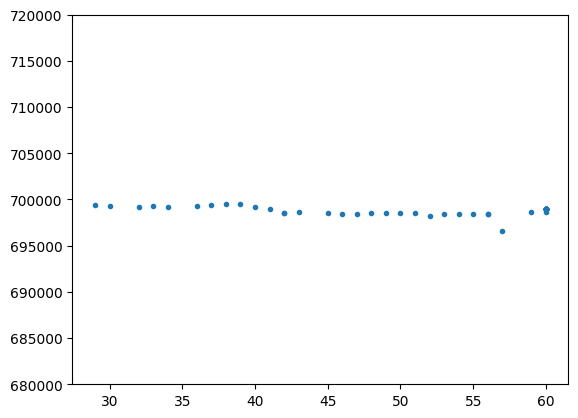

In [192]:
plt.plot(time_data, cpm_data, ".")
plt.ylim(680000, 720000)
plt.show()